---
# ESERCITAZIONE 1
---
## Esercizio 1.1 - Test di numeri pseudocasuali con distribuzione uniforme
### Punto 1 - Test della media
Nel primo punto di questa esercitazione si vuole testare il generatore di numeri casuali fornito. Il primo approccio consiste nel generare numeri pseudocasuali con distribuzione uniforme. Verifico che siano "casuali" calcolandone la media e verificando che all'aumentare del numero di estrazioni questa tenda al valore atteso, calcolato come: $\\\langle r \rangle = \int_0^1 r dr = 1/2$. I punti svolti in dettaglio sono qui riportati:$\\$

- Genero $M=10^6$ numeri pseudocasuali
- Li divido in $N=100$ blocchi da $L=10^4$ numeri per blocco.
- Per ogni blocco di numeri ne calcolo la media

In questo modo è possibile creare un plot della media cumulativa, con relativo errore, al variare del numero di blocchi preso in considerazione. $\\$

Per iniziare, importo le librerie necessarie e il file contenente la media cumulativa e relativo errore per ognuno dei $100$ blocchi.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Questa funzione di NumPy permette di caricare dei numeri scritti in colonne su file esterno.
# Devo specificare "unpack" per poter salvare le diverse colonne su variabili diverse,
# l'opzione "usecols" specifica quali colonne caricare,
# "skiprows" serve a saltare la prima riga, perché contiene delle stringhe che non sono caricabili
ave, err = np.loadtxt("./Dati_es1-1-1.txt", unpack= True, usecols=(0,1), skiprows=1)

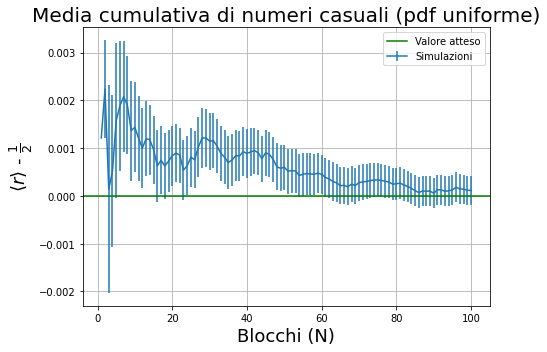

Valor medio dati simulati:  0.50011 +\- 0.0003
Livello di confidenza con il valore atteso:  0.38 sigma


In [15]:
N = len(ave)            # Il numero di blocchi è la lunghezza del file
x = np.arange(1, N+1)   # [1,2,...,N] sarà l'asse x del plot e indica il numero di blocchi utilizzato per la cumulazione

plt.figure(figsize=(7, 5))
plt.title("Media cumulativa di numeri casuali (pdf uniforme)",fontsize=20)

plt.errorbar(x, ave-0.5,yerr=err, label= "Simulazioni") # plotto la media cumulativa, e relativo errore, a cui sottraggo il valore atteso

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle r \rangle$ - $\frac{1}{2}$", fontsize=18)

plt.axhline(y=0, xmin=0, xmax=1, color = 'green', label = "Valore atteso")

plt.legend()

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

print("Valor medio dati simulati: ", round(ave[-1],5), "+\-", round(err[-1],5))
print("Livello di confidenza con il valore atteso: ",round((ave[-1] - 0.5)/err[-1],2), "sigma")


Dai risultati ottenuti, dopo $10^6$ lanci si ottiene $\langle r \rangle = 0.5001 \pm 0.0003$, questa prima analisi conferma dunque quanto aspettato.

### Punto 2 - test della deviazione standard della media
Analogamente al punto precedente, sempre considerando il calcolo cumulativo, verifico che la varianza di questi numeri tenda al valore atteso, calcolata come $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. $\\$

I dati sono (ovviamente) calcolati a partire dagli stessi numeri casuali utilizzati nell'analisi precedente.

In [16]:
# Importo nuovamente le librerie in modo che quando carico questo secondo file non devo compilare nuovamente anche sopra
import matplotlib.pyplot as plt
import numpy as np

ave2, err2 = np.loadtxt("./Dati_es1-1-2.txt", unpack= True, usecols=(0,1), skiprows=1)

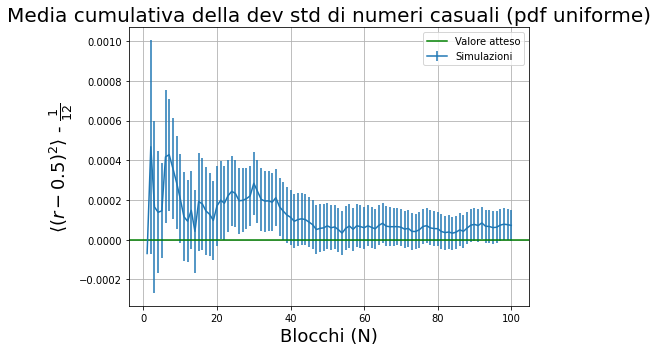

Valor medio dati simulati:  0.08341 +\- 8e-05
Livello di confidenza con il valore atteso:  0.92 sigma


In [17]:
x = np.arange(1, N+1)   # [1,2,...,N] sarà l'asse x del plot e indica il numero di blocchi utilizzato per la cumulazione

plt.figure(figsize=(7, 5))
plt.title("Media cumulativa della dev std di numeri casuali (pdf uniforme)",fontsize=20)

plt.errorbar(x, ave2-1/12, yerr=err2, label= "Simulazioni") # plotto la media cumulativa, e relativo errore, a cui sottraggo il valore atteso

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle \left(r-0.5 \right)^{2} \rangle$ - $\frac{1}{12}$", fontsize=18)

plt.axhline(y=0, xmin=0, xmax=1, color = 'green', label = "Valore atteso")

plt.legend()

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

print("Valor medio dati simulati: ", round(ave2[-1],5), "+\-", round(err2[-1],5))
print("Livello di confidenza con il valore atteso: ",round((ave2[-1] - 1/12)/err2[-1],2), "sigma")


Dai risultati ottenuti, i $10^6$ numeri pseudocasuali analizzati in precedenza hanno una varianza pari a $\langle \sigma^{2} \rangle = (83.40 \pm 0.08) \cdot 10^{-3}$. Questa seconda analisi conferma dunque quanto aspettato, infatti $\dfrac{1}{12} = 0.08\overline{3}$.

### Punto 3 - test del $\chi^{2}$
La terza analisi consiste nello stimare la probabilità che i dati pseudocasuali $non$ appartengano a una distribuzione uniforme. Se questa probabilità risulta essere bassa è possibile scartare l'ipotesi. $\\$
Per fare ciò, 'intervallo [0,1], range di estrazione dei numeri pseudo-casuali, viene diviso in $n_{bins}$ sottointervalli di uguale larghezza. Per l'ipotesi di uniformità della distribuzione, la probabilità che un numero estratto appartenga a uno qualsiasi tra questi sottointervalli dev'essere uguale. In questo modo si può quantificare la differenza tra il valore osservato $O_i$ (numeri caduti in un certo sottointervallo) e il valore atteso $E_i$. Per fare ciò si calcola il $\chi^2$ di Pearson, qui riportato: 

$\\ \chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$. $\\$

Data l'assunzione di distribuzione uniforme, il numero di eventi atteso per ogni sottointervallo è uguale e pari a $\dfrac{n_{throws}}{n_{bins}}$, con $n_{throws}$ il numero di lanci/estrazioni di numeri pseudocasuali. $\\$

L'analisi è ancora (ovviamente) svolta per il dataset di numeri casuali generati in precedenza. La suddivisione in blocchi permette di stimare $N=100$ valori di $\chi^{2}$, uno per ciascuno degli $N$ blocchi. Il numero di eventi totali per blocco sarà pari a $L = M/N = 10^{4}$. $\\$
Fissato un blocco, il numero di eventi atteso per ognuno degli $n_{bins} = 100$ sottointervalli è pari a $L/n_{bins} = 100$. $\\$
Una volta contati gli effettivi valori pseudocasuali in ogni sottointervallo posso stimarne il $\chi^{2}$ e plottarne quindi la distribuzione. $\\$
Dato che $(n_i - n_{throws}/n_{bins})^2 \simeq n_{throws}/n_{bins} = L/n_{bins}$ (con $n_i$ il numero di eventi in ogni sottointervallo) si attende un valore medio della distribuzione pari a $\chi^2 \simeq 100$

In [18]:
# Importo nuovamente le librerie in modo che quando carico questo secondo file non devo compilare nuovamente anche sopra
import matplotlib.pyplot as plt
import numpy as np

chi = np.loadtxt("./Dati_es1-1-3.txt", unpack= True, usecols=(0), skiprows=0)

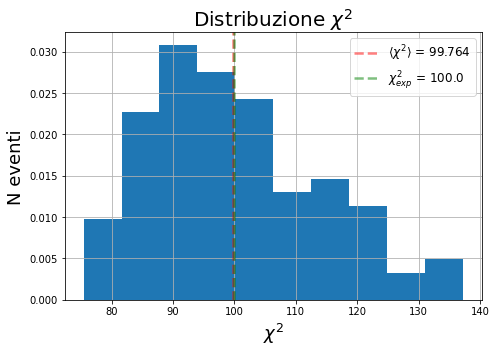

Valor medio chi quadro:  99.76


In [19]:
N=len(chi) # numero di blocchi
media = np.mean(chi)
exp = 100 # valore aspettato di numeri casuali per ogni sottointervallo di [0,1]

plt.figure(figsize=(7, 5))
plt.hist(chi, bins=10, density=True)

plt.axvline(media,label=r'$\leftangle \chi^{2} \rightangle$ = %.3f' %(media), color="red",alpha=0.5,ls='--', lw=2.5)
plt.axvline(100,label=r'$\chi^{2}_{exp}$ = %.1f' %(100), color="green",alpha=0.5,ls='--', lw=2.5)

plt.legend(loc='upper right', prop={'size': 12})

plt.title(r"Distribuzione $\chi^{2}$",fontsize=20)
plt.xlabel(r"$\chi^{2}$", fontsize=18)
plt.ylabel("N eventi", fontsize=18)

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()


print("Valor medio chi quadro: ", round(media,2))

## Esercizio 1.2 - Distribuzioni di probabilità alternative
Utilizzando il metodo dell'inversa della cumulativa, è possibile generare numeri casuali che seguono una vasta gamma di distribuzioni alternative a quella uniforme. In questo esercizio si verifica il teorema del limite centrale, generando $10^{6}$ numeri pseudocasuali con distribuzione uniforme, esponenziale ($p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$) e lorentziana ($p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$). $\\$
Successivamente si generano $10^{4}$ realizzazioni della variabile stocastica $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (con $N=1, 2, 10, 100$ e $x_i$ un numero pseudocasuale delle tre distribuzioni). Il dataset di $10^{4}$ valori è rappresentato in un istogramma, per ognuno dei quattro possibili valori di N e per ciascuna delle 3 distribuzioni. Si osserva, dunque, che i numeri casuali in totale devo essere $10^{6}$, per garantire la generazione di $10^{4}$ valori di $S_{N}$ nel caso di $N=100$. $\\$

I dati pseudocasuali per le tre distribuzioni in analisi sono salvati su file esterno, mentre l'analisi è interamente svolta in python.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import cauchy # fit con distribuzione di cauchy

# carico i dati di distribuzione standard, esponenziale e lorentziana
s, e, l= np.loadtxt("./Dati_es1-2.txt", unpack= True, usecols=(0,1,2), skiprows=1)

In [38]:
# R è la distribuzione di numeri casuali da plottare,
# xlim sono i limiti (sx, dx) del grafico da plottare
# text è il titolo del grafico
# R deve avere almeno 10^6 valori perché voglio calcolare 100 volte S_N usando N=10^4
def GraphPlotter(R, xlim, text, Cauchy = False):
        # Valori di S_N
    N = [100, 10, 2, 1]
    
    n_dati = int(1e4) # sono i 10^4 valori di S_N
    
    plt.figure(figsize=(7, 5))
    
    color = ['green', 'blue', 'yellow', 'red']
    for n,c in zip(N, color): # per ogni N degli S_N da fare (dico anche la lista dei colori)
        S_N = [np.sum([R[j+i*n] for j in range(n)])/n for i in range(n_dati)]  # fissato N salvo la lista con i 10^4 valori di S_N
        h, bins, pathces = plt.hist(S_N, bins=np.linspace(*xlim, 100), density=True, color=c, alpha=1, label=f'N={n}') # gli istogrammi per ogni N, fissando anche i valori estremi, inseriti nella funzione

        if n==100: # ovvero il fit lo faccio solo per l'istogramma con N=100
            if Cauchy: # se voglio fittare con cauchy 
                mu, sigma = cauchy.fit(S_N)
                y = cauchy.pdf(bins, mu, sigma) # Per il fit ho bisogno dei bins calcolati da plt.his in precedenza (per questo prima li ho estratti e salvati) 
            else:
                mu, sigma = norm.fit(S_N)
                y = norm.pdf(bins, mu, sigma) # Per il fit ho bisogno dei bins calcolati da plt.his in precedenza (per questo prima li ho estratti e salvati)
                
            plt.plot(bins, y, label = "Fit gaussiano", color='black')
            plt.plot(mu,0,linewidth=1, label=r'$\mu = %.2f $' %(mu), color="white")
            plt.plot(mu,0,linewidth=1, label=r'$\sigma = %.2f $' %(sigma), color="white")

    plt.legend(loc='upper right', prop={'size': 12})
    
    plt.title(text,fontsize=20)
    plt.xlabel(r"$S_N$", fontsize=18)
    plt.ylabel("N eventi", fontsize=18)
    
    plt.grid(True)
    plt.tight_layout() # per ridurre lo spazio bianco intorno
    # plt.savefig("Distribuzione_numeri casuali.pdf")
    plt.show()

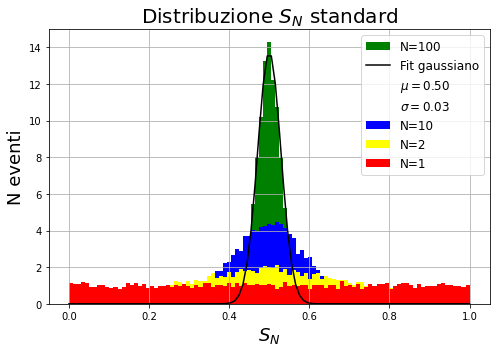

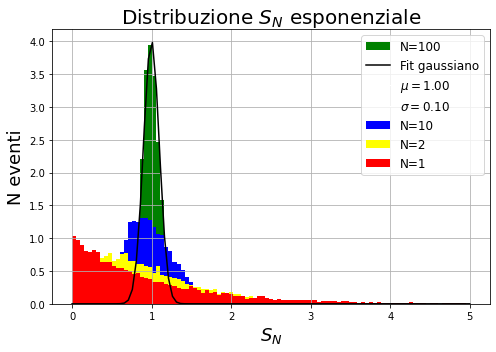

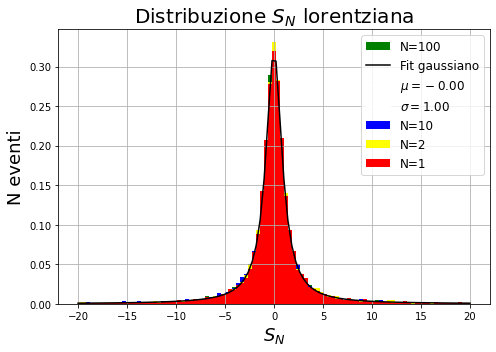

In [39]:
# Uso la funzione sulle 3 distribuzioni di dati, ottenendo 3 figure con 4 istrogrammi ognuna
GraphPlotter(s, (0, 1), "Distribuzione $S_N$ standard")
GraphPlotter(e, (0, 5), "Distribuzione $S_N$ esponenziale")
GraphPlotter(l, (-20, 20), "Distribuzione $S_N$ lorentziana", Cauchy=True)

Si nota che nei primi due casi la distribuzione limite è gaussiana, come teoricamente atteso. Nel terzo caso invece, proprio perché la distribuzione dei dati è lorentziana, la distribuzione limite è ancora una lorentziana. Si nota anche che il fit gaussiano non è eseguibile, mentre lo è uno lorentziano. In questo caso la forma della distribuzione non cambia all'aumentare dei dati, perché già $N=1$ è la distribuzione limite. $\\$

Questi risultati confermano le aspettative previste dal teorema del limite centrale.

## Esercizio 1.3 - Stima di $\pi$ con esperimento di Buffon
Si stima il valore di $\pi$ dai lanci di un ago di lunghezza $L$ su un insieme di linee equispaziate a distanza $d>L$. La probabilità che l'ago intersechi una delle linee è legata a $\pi$ dalla seguente relazione (con $P=\dfrac{n_{int}}{n_{lanci}}$):

$$\pi = \frac{2L}{Pd} = \lim_{N_{lanci} \to \infty}\frac{2 \cdot L \cdot N_{lanci}}{N_{int}\cdot d}$$

Nel sistema di riferimento considerato, le linee parallele sono orizzontali. Chiamo $x$ l'asse parallelo a queste linee e $y$ quello ortogonale a esse. $\\$
Il sistema è invariante per traslazioni lungo $x$ e simmetrico con periodo $d$ per traslazioni lungo $y$. Posso dunque considerare in modo equivalente che il sistema sia monodimensionale (guardo solo la direzione $y$) e che le linee siano solamente due. $\\$
Simulo i lanci casuali dell'ago generando un dataset di $10^7$ coppie di numeri:
Il primo rappresenta l'altezza $y_1$ di un estremo dell'ago rispetto alla linea inferiore (quindi si avrà $y_1 \in [0,d]$), mentre il secondo è l'angolo di inclinazione $\theta$ dell'ago rispetto all'asse parallelo alle linee ( $\theta \in [0, 2\pi)$). Entrambi questi numeri seguono una distribuzione uniforme. $\\$
La condizione di intersezione dell'ago con le linee si ha per: 
$$y_1+y_2 \leq 0 \lor y_1+y_2 \geq d$$
dove $y_2$ è la proiezione del punto superiore dell'ago sull'asse $y$, ovvero: $y_2 = L\cdot\sin\theta$.
In questo caso si utilizza $d=1$ e $L = 0.85 \cdot d$

Plotto quindi la stima di $\pi$ con deviazione standard della media, al variare del numero di blocchi utilizzati.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# carico i dati dell'altezza y del punto inferiore dell'ago e del suo angolo d'inclinazione theta rispetto all'asse x
# OSS: l'angolo è in gradi
# OSS: y è in [0,1], quindi L < 1
ave_PI, err_PI = np.loadtxt("./Dati_es1-3.txt", unpack= True, usecols=(0,1), skiprows=1)

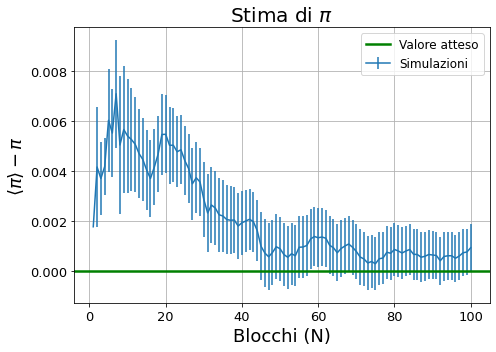

Valor medio di pigreco dai dati simulati:  3.143 +\- 0.001
Livello di confidenza con il valore atteso:  1.0 sigma


In [3]:
N=len(ave_PI) # numero di blocchi
x = np.arange(1, N+1)      # [1,2,...,N] valori asse x, numero di blocchi

plt.figure(figsize=(7, 5))
plt.title("Stima di $\pi$",fontsize=20)

plt.errorbar(x, ave_PI-np.pi, yerr= err_PI, label = "Simulazioni") #plotto la media cumulativa

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle \pi \rangle - \pi$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=0, xmin=0, xmax=1, label= "Valore atteso", lw = 2.5, color = 'green')

plt.legend(loc='upper right', prop={'size': 12})


plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Stima_pigreco.pdf")
plt.show()

print("Valor medio di pigreco dai dati simulati: ", round(ave_PI[-1],3), "+\-", round(err_PI[-1],3))
print("Livello di confidenza con il valore atteso: ",round((ave_PI[-1] - np.pi)/err_PI[-1],2), "sigma")

Si noti che il valore stimato di $\pi$ dopo $10^7$ lanci è compatibile a $1\sigma$ con il valore vero.